In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet

In [3]:
print(Prophet.__version__)

1.0


### Load Dataset

In [8]:
path = os.path.join('..', 'data', 'monthly-car-sales.csv')
df = pd.read_csv(path, header=0)

In [12]:
df.head(3)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


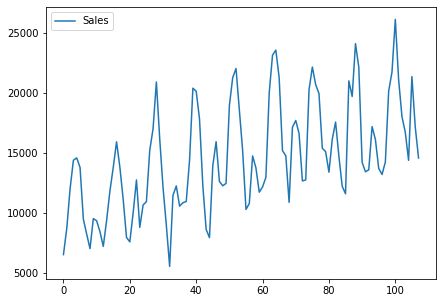

In [18]:
# Draw plot
df.plot(figsize=(7, 5))
plt.show()

#### Forecast Car Sales

In [24]:
# Prepare expected column names
df = df.rename(columns={'Month': 'ds', 'Sales': 'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m')

In [29]:
# Define the model
model = Prophet()

# Fit the model
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
# define the period to predict
prediction = pd.date_range(start='1968-01', end='1968-12', freq='MS')
prediction = pd.DataFrame(prediction)
prediction.columns = ['ds']
# prediction['ds'] = pd.to_datetime(prediction['ds'], format='%Y-%m-%s')

In [51]:
# forecast the prediction timeline
forecast = model.predict(prediction)

In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14363.556656,12866.600888,15899.270930
1,1968-02-01,14929.449809,13226.822939,16508.826889
2,1968-03-01,20893.417179,19256.710361,22448.114189
3,1968-04-01,22910.515245,21255.834547,24493.627207
4,1968-05-01,24200.784363,22632.992107,25831.160395


In [ ]:
# 